# DS Fellows Project: College Graduates

## By: Robin Hollingsworth

For this assignment, we will be working with a dataset containing information on recent graduates for various majors. It includes variables such as major category, number of employed/unemployed and part-time/full-time workers to evaluate the pros and cons of various majors offered in the US.

The dataset originates from the Census Bureau’s American Community Survey (ACS) Public Use Microdata Sample (PUMS) files and was featured in an article on FiveThirtyEight called "The Economic Guide To Picking A College Major". 

Dataset: https://github.com/fivethirtyeight/data/tree/master/college-majors
         https://www.census.gov/programs-surveys/acs/microdata.html

Article: https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/

In [1]:
# Run this cell to import libraries
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Q0: Load and Clean Dataset

First, let's load the dataset ("college-grads.csv") into a variable called *grads* and view the dataset.

In [2]:
grads = Table().read_table("college-grads.csv") # SOLUTION
grads # SOLUTION

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,1849,270,1207,37,0.0183805,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037,3,648,558,133,340,16,0.0240964,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313,16,758,1069,150,692,40,0.0501253,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.0610977,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
7,6202,ACTUARIAL SCIENCE,3777,2110,1667,Business,0.441356,51,2912,2924,296,2482,308,0.0956522,62000,53000,72000,1768,314,259
8,5001,ASTRONOMY AND ASTROPHYSICS,1792,832,960,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.0211674,62000,31500,109000,972,500,220
9,2414,MECHANICAL ENGINEERING,91227,80320,10907,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.0573423,60000,48000,70000,52844,16384,3253
10,2408,ELECTRICAL ENGINEERING,81527,65511,16016,Engineering,0.19645,631,61928,55450,12695,41413,3895,0.0591738,60000,45000,72000,45829,10874,3170


### Q0.1 Clean Columns

The columns/variables that we are focusing on are going to be the following:
    
- **Major**: major description
- **Major_category**: category of major from Carnevale et al (http://cew.georgetown.edu/whatsitworth)
- **Men**: number of male graduates
- **Women**: number of female graduates
- **ShareWomen**: percentage of total major population that identifies as female
- **Unemployment_rate**: $\frac{\text{unemployed}}{\text{unemployed + employed}}$
- **Median**: median earnings of full-time, year-round workers

Create a variable called *grads_clean* that takes *grads* and selects only these columns necessary for our analysis. We need to change the column named "Median" to "Salary". View the new clean dataset.

In [3]:
grads_clean = grads.select(["Major","Major_category","Men","Women","ShareWomen",
                            "Unemployment_rate", "Median"]).relabeled("Median","Salary") # SOLUTION
grads_clean # SOLUTION

Major,Major_category,Men,Women,ShareWomen,Unemployment_rate,Salary
PETROLEUM ENGINEERING,Engineering,2057,282,0.120564,0.0183805,110000
MINING AND MINERAL ENGINEERING,Engineering,679,77,0.101852,0.117241,75000
METALLURGICAL ENGINEERING,Engineering,725,131,0.153037,0.0240964,73000
NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1123,135,0.107313,0.0501253,70000
CHEMICAL ENGINEERING,Engineering,21239,11021,0.341631,0.0610977,65000
NUCLEAR ENGINEERING,Engineering,2200,373,0.144967,0.177226,65000
ACTUARIAL SCIENCE,Business,2110,1667,0.441356,0.0956522,62000
ASTRONOMY AND ASTROPHYSICS,Physical Sciences,832,960,0.535714,0.0211674,62000
MECHANICAL ENGINEERING,Engineering,80320,10907,0.119559,0.0573423,60000
ELECTRICAL ENGINEERING,Engineering,65511,16016,0.19645,0.0591738,60000


### Q0.2
How many majors are in this dataset? Store this in a variable called *numMajors*.

In [4]:
numMajors = grads_clean.num_rows # SOLUTION
print("Number of Majors:", numMajors)

Number of Majors: 173


## Q2: Post-Grad Unemployment Rate and Salary

When choosing a major to study at college, most people want to study something to get a job post-grad that they would like. Two of the many things to take into consideration when deciding your future career path included: job security and salary. We are going to take a look at the unemployment rates and median salaries for the post-grad workers for all majors in this dataset.

### Q2.1 
Let's start by finding the mean unemployment rates and salaries of all majors using the *Unemployment_rate* and *Salary* from the *grads_clean* dataset. Create two variables called *unemployment_mean* and *salary_mean*, respectively.

In [5]:
unemployment_mean = grads_clean.column("Unemployment_rate").mean() # SOLUTION
salary_mean = grads_clean.column("Salary").mean() # SOLUTION

print("{:.2f}%".format(unemployment_mean*100), ",", "${:.2f}".format(salary_mean))

6.82% , $40151.45


### Q2.2
Now, we are going to take a look at the relationship between unemployment rate and salary by plotting the two variables. 

Create a plot using *plt.scatter(x, y, 'bo')* and the *grads_clean* dataset to plot unemployment rate on the x-axis and salary on the y-axis. Make sure to have a proper title and axis labels. **Optional:** use plt.vlines to plot a vertical line representing the mean unemployment rate.

What does each point represent? Are there any outliers that stand out? Where do the "best" points fall on the graph? Why are they the "best"? Where are the worst?

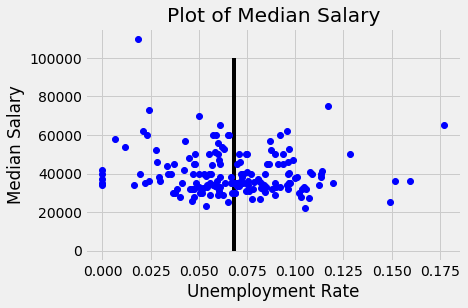

In [6]:
# BEGIN SOLUTION
plt.plot(grads_clean['Unemployment_rate'], grads_clean['Salary'], 'bo')
plt.vlines(unemployment_mean, ymin=0, ymax=100000)
plt.title("Plot of Median Salary")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Salary")
# END SOLUTION
plt.show()

### Q2.3

Find the "Statistics and Decision Science" major. Is the salary for a Statistics and Decision Science major higher or lower than the mean calculated in part 2.1? Is the unemployment rate for a Statistics and Decision Science major higher or lower than the mean? (Be careful of capitalization!)

In [7]:
grads_clean.where("Major","STATISTICS AND DECISION SCIENCE") # SOLUTION

Major,Major_category,Men,Women,ShareWomen,Unemployment_rate,Salary
STATISTICS AND DECISION SCIENCE,Computers & Mathematics,2960,3291,0.526476,0.0862737,45000


### Q2.4
Data analysis is not always just looking at the numbers. Sometimes you need to think beyond the numeric values to paint a complete picture. Many people place high importance on job security (unemployment rates) and salary when looking for a job or deciding what to major in. What are some other factors that would be important when choosing a field of study?

## Q3: Women in Engineering

The engineering based majors have stereotypically been very male dominated fields. Let's use the data to see if it supports this claim and look at the percentage of women in certain fields.

### Q3.1
Take our *grads_clean* dataset and only choose the majors which fall under the Engineering major category into a table called *women_eng*. Then take the majors from *grads_clean* in Computers & Mathematics major category into a table called *women_comp*.

Save the mean value of *ShareWomen* for both of these categories as *engMean* and *compMean*.

In [8]:
women_eng = grads_clean.where("Major_category", "Engineering") # SOLUTION
women_comp = grads_clean.where("Major_category", "Computers & Mathematics") # SOLUTION

engMean = women_eng['ShareWomen'].mean() # SOLUTION
compMean = women_comp['ShareWomen'].mean() # SOLUTION

print("Engineering:", engMean)
print("Computers & Math:", compMean)

Engineering: 0.23888867596551722
Computers & Math: 0.3117722051818182


### Q3.2
Select another major category of your choosing and repeat the previous steps (3.1) with the new major of finding the mean of *ShareWomen*.

How does this mean percentage compare to the Engineering and Computers & Mathematics categories? Where you expecting this? Assuming overall the ratio of men to women is equal and the percentage of women in all majors is 0.5, how do the Engineering, Computers & Mathematics, and your category selection compare to the overall 50%?

## Q4: Further Research
Choose one:

(a) The world is rapidly changing and the most lucrative careers are constantly changing and evolving. Research a field of study or major that you think has potential to be important and successful in the future and discuss why you think so. 

(b) If you would like to dive deeper into discovering how the gender balance within majors/careers is evolving, look up an article on one of the major/career categories in Question 3 that explores this topic. Paste the link to the article and briefly summarize your findings.